<a href="https://colab.research.google.com/github/simranbiswas/HandwritingRecog_CNN/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# compiling is the same as before
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.0M  100 11.0M    0     0  8419k      0  0:00:01  0:00:01 --:--:-- 8413k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

In [3]:
!ls build

lib.linux-x86_64-3.7  temp.linux-x86_64-3.7


In [4]:
!ls build/lib.linux-x86_64-3.7/pysqlite3/

dbapi2.py  __init__.py	_sqlite3.cpython-37m-x86_64-linux-gnu.so


In [5]:
!ls /usr/lib/ | grep python

python2.7
python3
python3.6
python3.7
python3.8


In [10]:
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/

In [1]:
import sqlite3
sqlite3.sqlite_version

'3.37.2'

In [2]:
pip install -U google-cloud-vision

  Using cached google_cloud_vision-2.6.3-py2.py3-none-any.whl (370 kB)
  Using cached google_api_core-2.5.0-py2.py3-none-any.whl (111 kB)
  Using cached proto_plus-1.20.0-py3-none-any.whl (45 kB)
  Using cached grpcio_status-1.43.0-py3-none-any.whl (10.0 kB)
  Using cached protobuf-3.19.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 1.5.0 requires google-api-core[grpc]<2.0.0dev,>=1.6.0, but you have google-api-core 2.5.0 w

In [1]:
pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=c4ca688d72e387bb1cd6595ba742201a3d4ec70563546d4d4a56ffc220512212
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [2]:
pip install -U pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=0f3e6d2f9194cbfccf0449d27f74a27a9f721f57cf3fd7425aef7917b7dc21dc
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [1]:
from IPython.display import Image
from matplotlib import pyplot as plt
import pandas as pd, numpy as np
import cv2
import pandasql as ps
pd.options.display.float_format = '{:,.2f}'.format

from google.cloud import vision
import io

import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("drive/My Drive/letters")

!ls
         
fileList = [x for x in os.listdir() if 'png'  in x.lower()]
fileList[:5]

Mounted at /content/drive
j04-019.png  j06-008.png  j06-051.png  k04-010.png


['j04-019.png', 'j06-008.png', 'j06-051.png', 'k04-010.png']

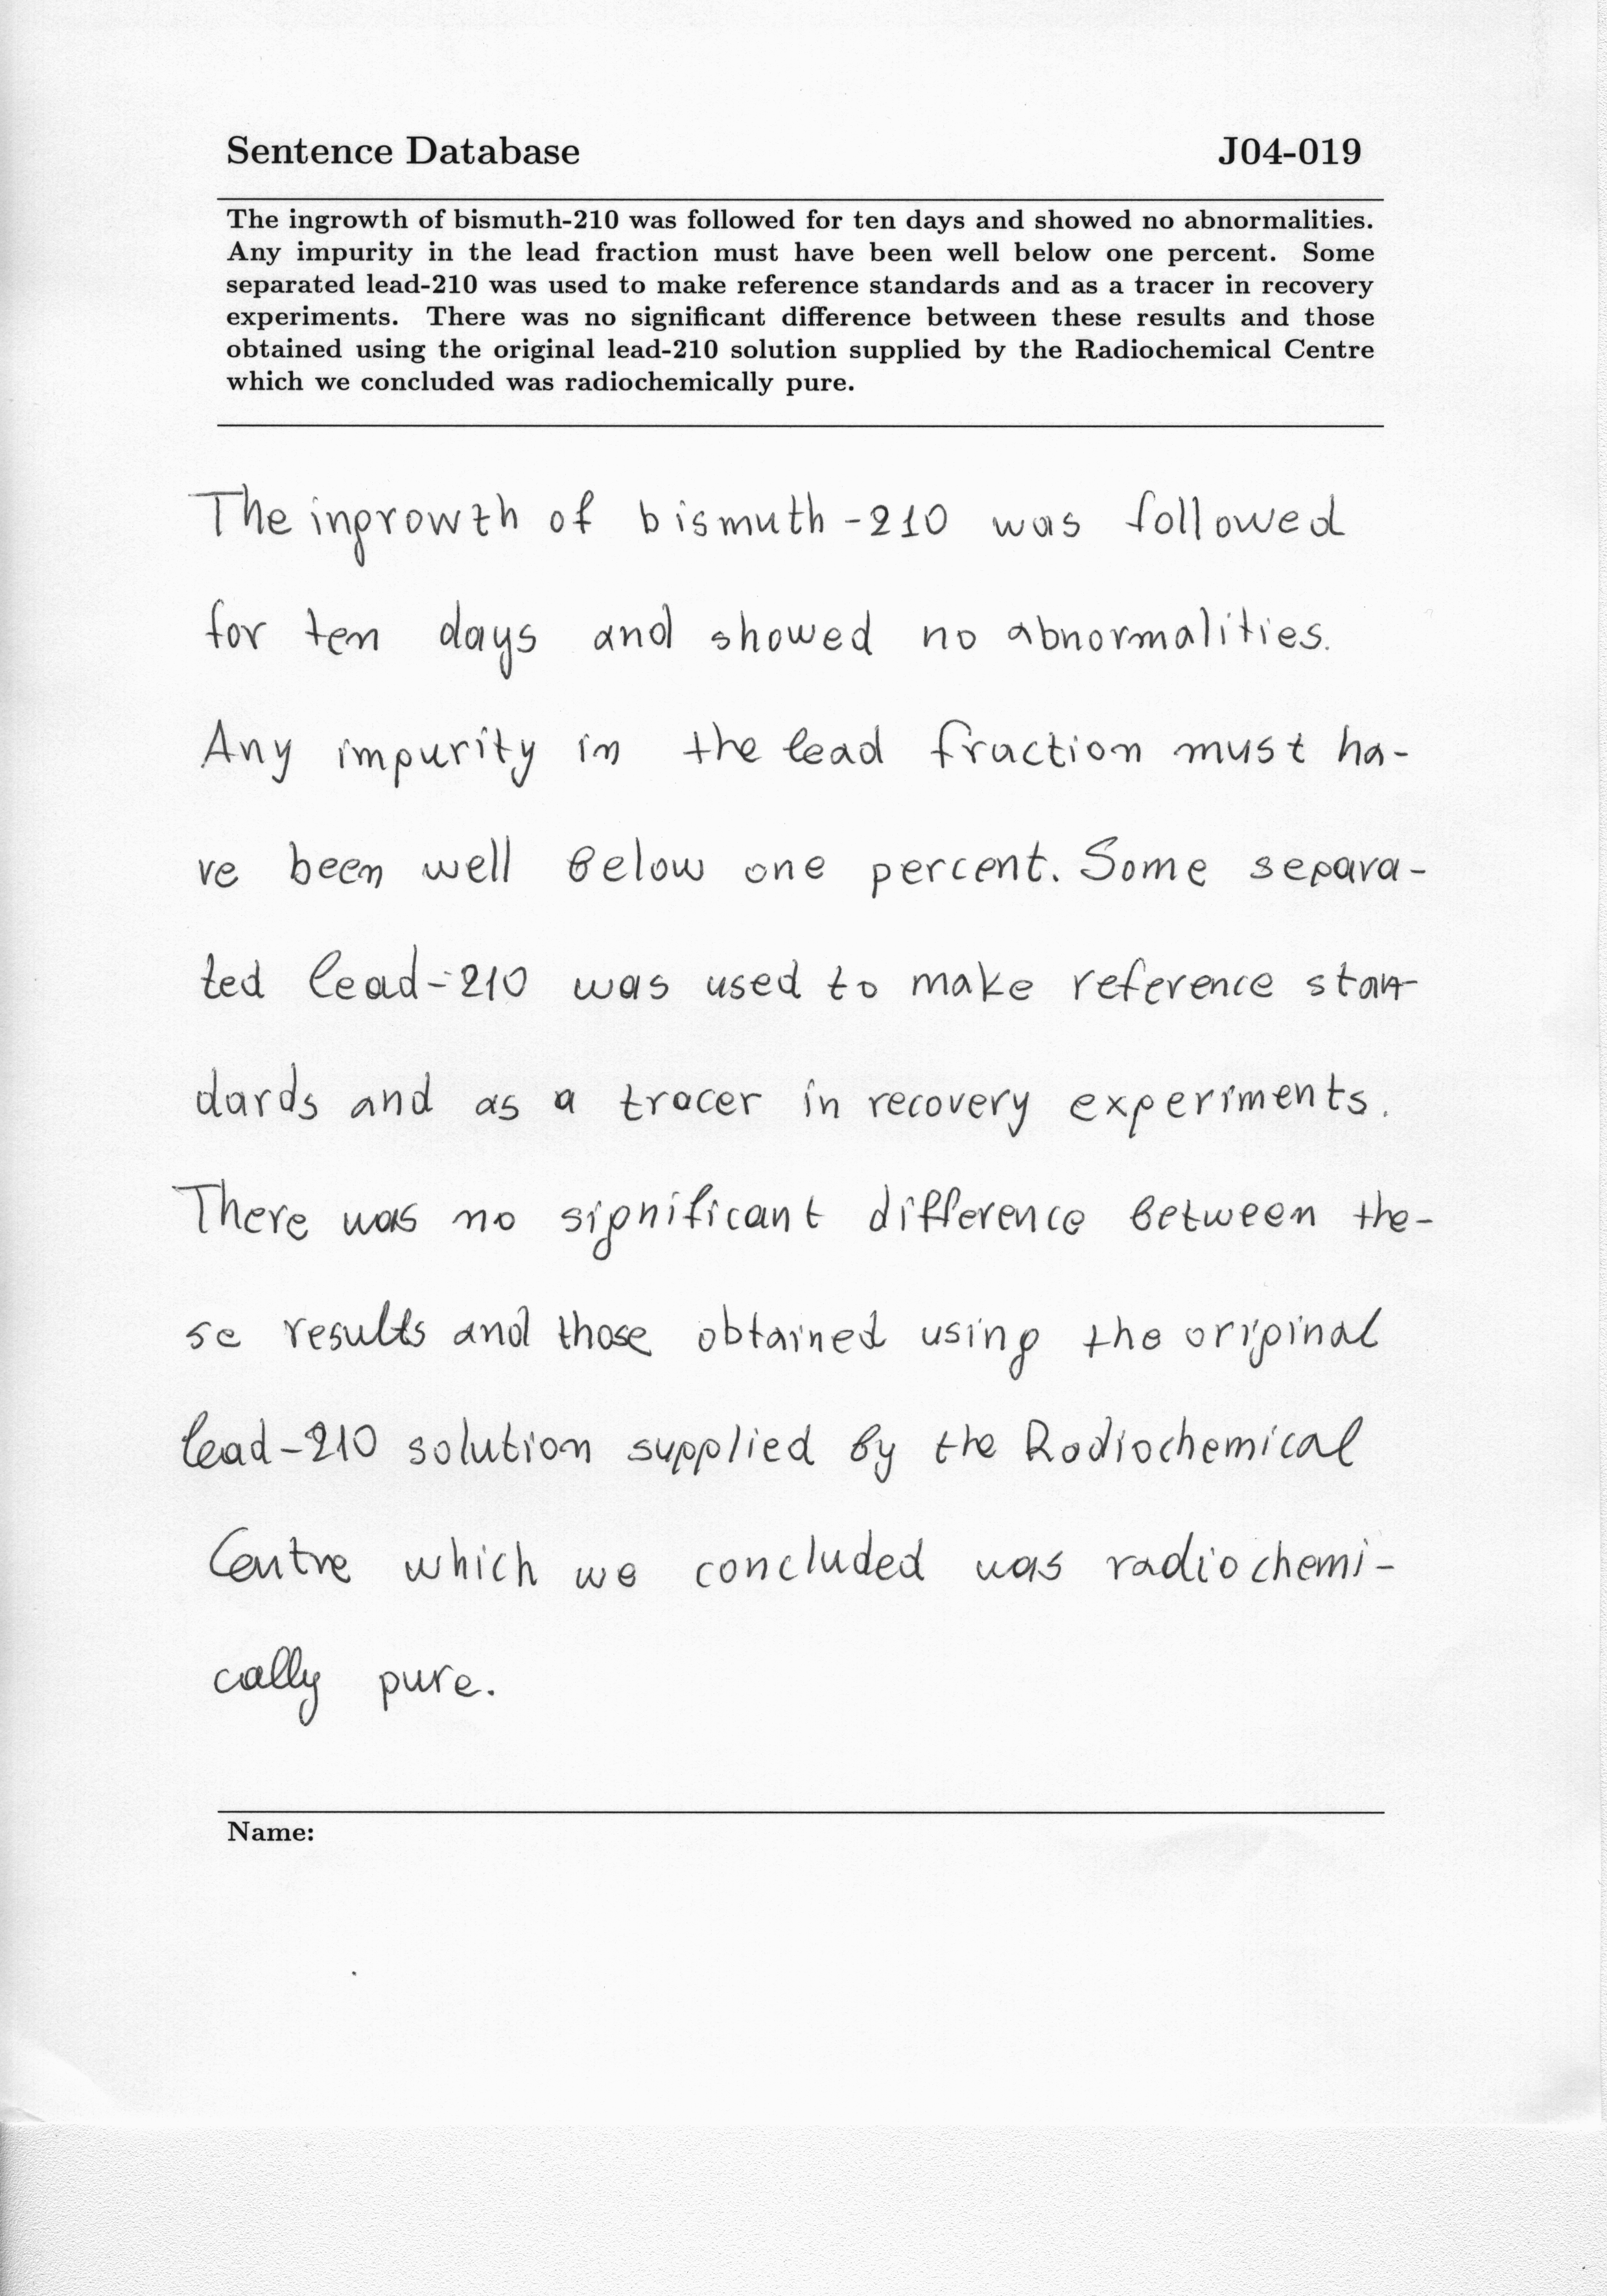

In [3]:
Image(filename = fileList[0], width = 300)

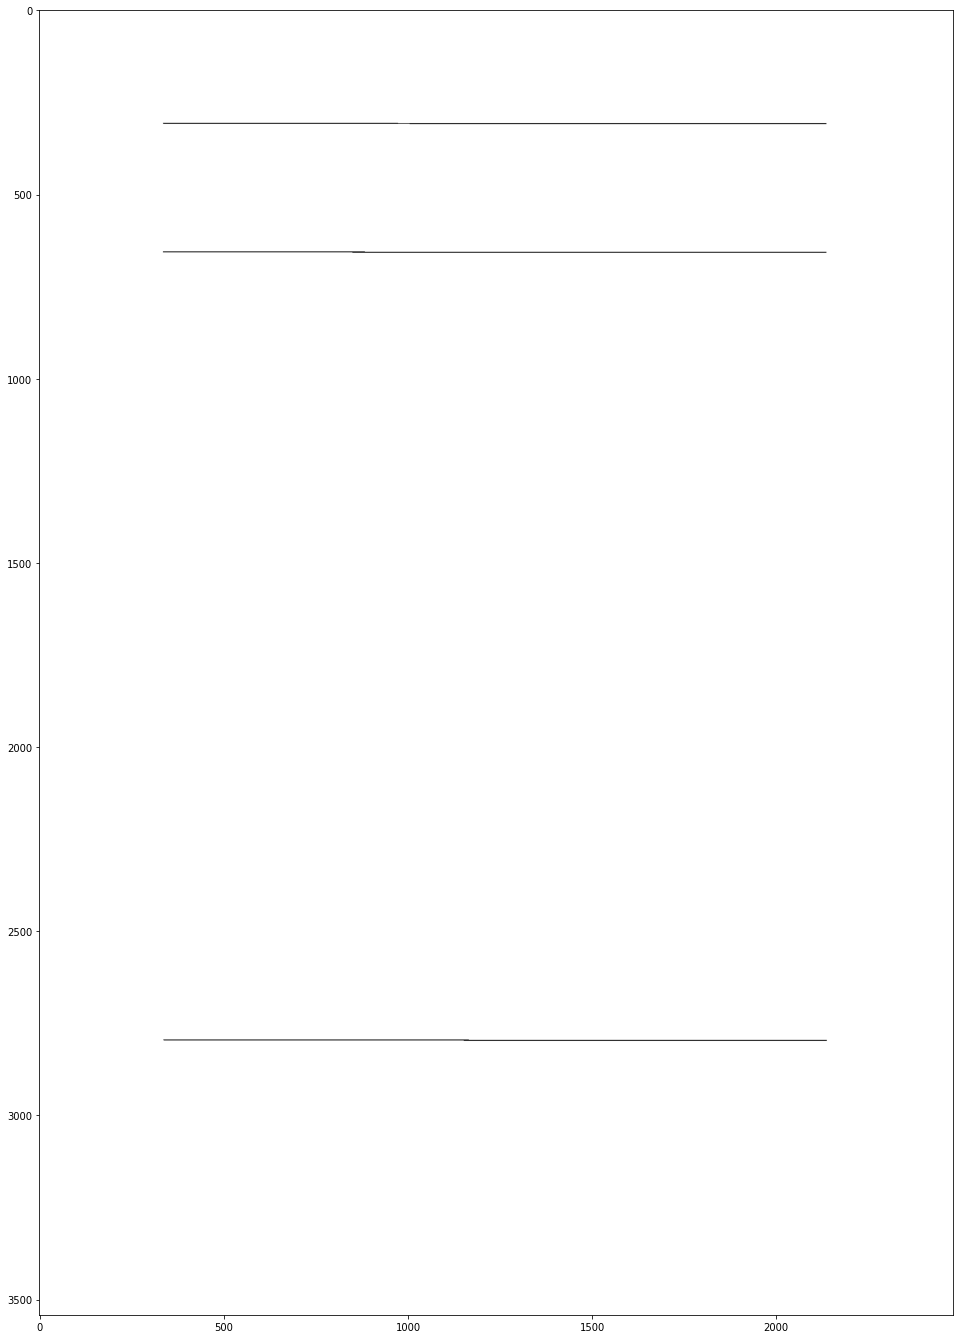

In [4]:
img = fileList[0]

def findHorizontalLines(img):
    img = cv2.imread(img) 
    
    #convert image to greyscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # set threshold to remove background noise
    thresh = cv2.threshold(gray,30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    
    # define rectangle structure (line) to look for: width 100, hight 1. This is a 
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,1))
    
    # Find horizontal lines
    lineLocations = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    
    return lineLocations

lineLocations = findHorizontalLines(img)
plt.figure(figsize=(24,24))
plt.imshow(lineLocations, cmap='Greys')

In [5]:
df_lineLocations = pd.DataFrame(lineLocations.sum(axis=1)).reset_index()
df_lineLocations.columns = ['rowLoc', 'LineLength']
df_lineLocations[df_lineLocations['LineLength'] > 0]

rowLoc  LineLength
306      306      162690
307      307      459000
308      308      458745
309      309      288405
655      655      139740
656      656      459000
657      657      459000
658      658      327930
2794    2794      211395
2795    2795      459000
2796    2796      458745
2797    2797      251175

In [6]:
df_lineLocations['line'] = 0
df_lineLocations['line'][df_lineLocations['LineLength'] > 100] = 1

df_lineLocations['cumSum'] = df_lineLocations['line'].cumsum()

In [7]:
df_lineLocations.head()

rowLoc  LineLength  line  cumSum
0       0           0     0       0
1       1           0     0       0
2       2           0     0       0
3       3           0     0       0
4       4           0     0       0

In [12]:
import pandasql as ps

df_lineLocations['rowLoc'] = df_lineLocations['rowLoc'].astype(int)
df_lineLocations['LineLength'] = df_lineLocations['LineLength'].astype(int)

query = '''
select row_number() over (order by cumSum) as SegmentOrder
, min(rowLoc) as SegmentStart
, max(rowLoc) - min(rowLoc) as Height
from df_lineLocations
where line = 0
--and CumSum !=0
group by cumSum
'''

df_SegmentLocations  = ps.sqldf(query, locals())
df_SegmentLocations

SegmentOrder  SegmentStart  Height
0             1             0     305
1             2           310     344
2             3           659    2134
3             4          2798     743

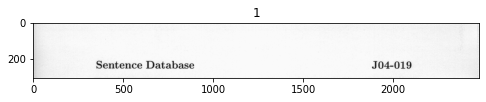

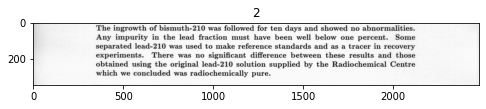

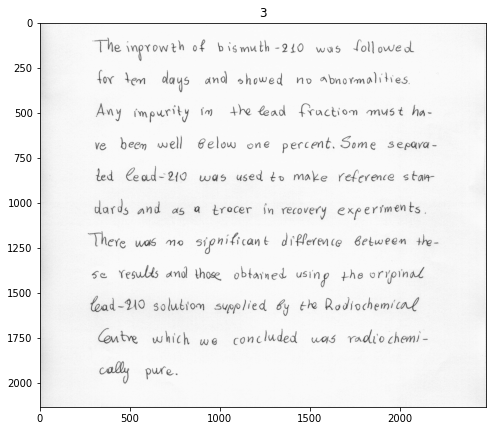

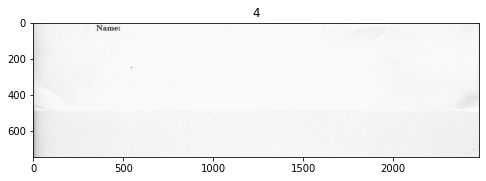

In [13]:
def pageSegmentation1(img, w, df_SegmentLocations):
    img = cv2.imread(img) 
    im2 = img.copy()
    segments = []

    for i in range(len(df_SegmentLocations)):
        y = df_SegmentLocations['SegmentStart'][i]
        h = df_SegmentLocations['Height'][i]

        cropped = im2[y:y + h, 0:w] 
        segments.append(cropped)
        plt.figure(figsize=(8,8))
        plt.imshow(cropped)
        plt.title(str(i+1))        

    return segments

img = fileList[0]
w = lineLocations.shape[1]
segments = pageSegmentation1(img, w, df_SegmentLocations)


In [14]:
# Extract text from image with two columns of contents
import re
import cv2
import pytesseract
from pytesseract import Output

# tell pytesseract where the engine is installed
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def extractTextFromImg(segment):
    text = pytesseract.image_to_string(segment, lang='eng')         
    text = text.encode("gbk", 'ignore').decode("gbk", "ignore")
        
    return text


In [15]:
segment = segments[1]
text = extractTextFromImg(segment)
print(text)

The ingrowth of bismuth-210 was followed for ten days and showed no abnormalities.
Any impurity in the lead fraction must have been well below one percent. Some
separated lead-210 was used to make reference standards and as a tracer in recovery
experiments. There was no significant difference between these results and those
obtained using the original lead-210 solution supplied by the Radiochemical Centre
which we concluded was radiochemically pure.



In [16]:
segment = segments[2]
text = extractTextFromImg(segment)
print(text)

The mervow th of bigmuth -210 was Lollowed
foy Lem days and showed no Abnormalities,
Any impurity tm dhe fead fraction must ha-
ve been well @elow one percent, Some sepava-
led Cead-210 was used to mate referee star
dards and as a tracer fy recovery experiments ,
“There was no sipnitican  drfhevence 6etween tHe-
se Yesulds andl those. obtarned usin 9 the oripinal
foad-HO solubion supplied 6y the Rodiochemicat
Contve which we concluded uas radio chemi -

cay pure.




# Step 3. Extract handwritten text using Google Cloud Vision API


In [26]:
from google.colab import files
uploaded = files.upload()

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./json-key.json"
print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))


Saving json-key.json to json-key.json
Credendtials from environ: ./json-key.json


In [28]:

def CloudVisionTextExtractor(handwritings):
    # convert image from numpy to bytes for submittion to Google Cloud Vision
    _, encoded_image = cv2.imencode('.png', handwritings)
    content = encoded_image.tobytes()
    image = vision.Image(content=content)
    
    # feed handwriting image segment to the Google Cloud Vision API
    client = vision.ImageAnnotatorClient()
    response = client.document_text_detection(image=image)
    
    return response

def getTextFromVisionResponse(response):
    texts = []
    for page in response.full_text_annotation.pages:
        for i, block in enumerate(page.blocks):  
            for paragraph in block.paragraphs:       
                for word in paragraph.words:
                    word_text = ''.join([symbol.text for symbol in word.symbols])
                    texts.append(word_text)

    return ' '.join(texts)

In [31]:
handwritings = segments[2]
response = CloudVisionTextExtractor(handwritings)
handwrittenText = getTextFromVisionResponse(response)
print(handwrittenText)


PermissionDenied: ignored